In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:

# Generate random time series signals
np.random.seed(0)  
signal_length = 100
signal1 = np.random.rand(signal_length)
signal2 = np.random.rand(signal_length)


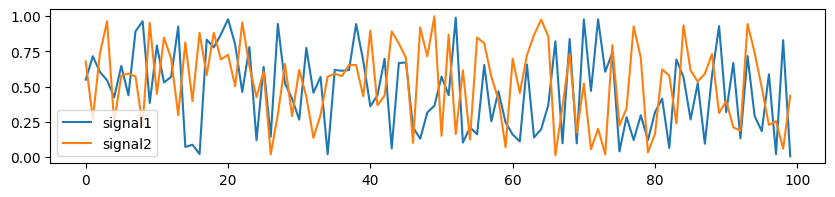

In [24]:
plt.figure(figsize=(10,2))
plt.plot(signal1,label='signal1')
plt.plot(signal2,label='signal2')
plt.legend()

In [30]:

# Method 1: Compute the correlation function for the whole signals
startt = time.time()
correlation_function_whole = np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')
correlation_function_whole /= (np.std(signal1) * np.std(signal2) * signal_length)
lags_whole = np.arange(-signal_length + 1, signal_length)
endt = time.time()
print("Correlation function of the whole signals computed in %f seconds"%(endt-startt))


# Method 2: Divide signals into windows and compute correlation functions for each window
startt = time.time()
window_size = 20  # Size of each window
num_windows = signal_length // window_size

correlation_functions_windows = []

for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    window1 = signal1[start:end]
    window2 = signal2[start:end]
    
    corr_function_window = np.correlate(window1 - np.mean(window1), window2 - np.mean(window2), mode='full')
    corr_function_window /= (np.std(window1) * np.std(window2) * window_size)
    correlation_functions_windows.append(corr_function_window)

# Average the correlation functions across all windows
average_correlation_function_windows = np.mean(correlation_functions_windows, axis=0)
lags_windows = np.arange(-window_size + 1, window_size)

endt=time.time()
print("Average correlation function of windows computed in %f seconds"%(endt-startt))


Correlation function of the whole signals computed in 0.000996 seconds
Average correlation function of windows computed in 0.005001 seconds


C:\Users\s2122917\AppData\Local\Temp\ipykernel_12332\1274160100.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


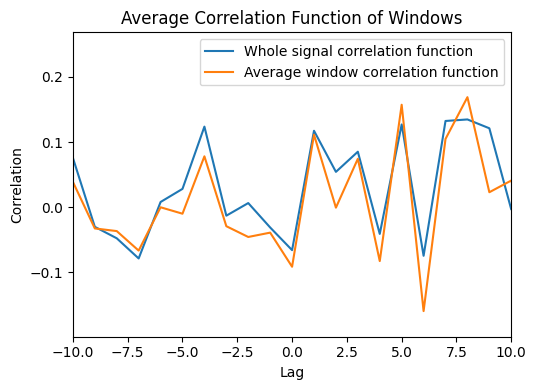

In [25]:

# Plot the correlation functions
plt.figure(figsize=(10, 4))

# Plot for the whole signal
plt.subplot(1, 2, 1)
plt.plot(lags_whole, correlation_function_whole, label='Whole signal correlation function')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Correlation Function of Whole Signals')
plt.legend()

# Plot for the average window correlation function
plt.subplot(1, 2, 1)
plt.plot(lags_windows, average_correlation_function_windows, label='Average window correlation function')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Average Correlation Function of Windows')
plt.legend()
plt.xlim(-10,10)
plt.tight_layout()
plt.show()

